In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
from owslib.csw import CatalogueServiceWeb
from owslib.fes import PropertyIsEqualTo, PropertyIsLike, BBox
import pandas as pd
from ipyaggrid import Grid

csw = CatalogueServiceWeb('http://explorer-geonetwork.azurewebsites.net/geonetwork/srv/eng/csw')

permit_query = PropertyIsEqualTo('csw:AnyText', '%Permits%')
csw.getrecords2(constraints=[permit_query], maxrecords=200)

data = {}
attribs = ['identifier', 'title', 'abstract', 'type', 'subjects' ]
for key in csw.records:
    record = csw.records[key]
    for attrib in attribs:
        if attrib not in data.keys():
            data[attrib] = []
        data[attrib].append(getattr(record, attrib))

df_record = pd.DataFrame(data)

record_column_defs = [{'field': c, 'width': 300, 'editable': True} for c in df_record.columns]

record_grid_options = {
    'columnDefs' : record_column_defs,
    'enableFilter':'true',
    'enableSorting':'true'
}

g_record = Grid(
    grid_data=df_record,
    grid_options=record_grid_options,
    theme='ag-theme-balham',
    columns_fit='',
    quick_filter=True,
    export_csv=True,
    export_excel=True
)

g_record

Grid(compress_data=True, export_mode='disabled', height='350px', menu={'buttons': [{'name': 'Export to CSV', '…

In [20]:
from owslib.csw import CatalogueServiceWeb

csw.getrecordbyid(id=['aecdf0b2b48a07a8f95888d245781b9dc2a3faec', 'b194c58124d86f7cab8a1890e8e51971ec6443d9'])

record = csw.records['aecdf0b2b48a07a8f95888d245781b9dc2a3faec']
petro_permit_layer = record.uris[0]

petro_permit_layer

{'protocol': 'OGC:WFS-1.1.0-http-get-feature',
 'name': 'Permits_Petroleum:Petroleum_Active_Permits',
 'description': 'Petroleum_Active_Permits',
 'url': 'https://data.nzpam.govt.nz/hosting/services/Permits/Petroleum/MapServer/WFSServer?'}

In [21]:
record = csw.records['b194c58124d86f7cab8a1890e8e51971ec6443d9']
mineral_permit_layer = record.uris[0]

mineral_permit_layer

{'protocol': 'OGC:WFS-1.1.0-http-get-feature',
 'name': 'Permits_Minerals:Mineral_Active_Permits',
 'description': 'Mineral_Active_Permits',
 'url': 'https://data.nzpam.govt.nz/hosting/services/Permits/Minerals/MapServer/WFSServer?'}

In [22]:
import geopandas as gpd
from requests import Request
from owslib.wfs import WebFeatureService

params = dict(
    service='WFS', 
    version="2.0.0", 
    request='GetFeature', 
    typeName=petro_permit_layer['name'], 
    outputFormat='geojson', 
    srsname='urn:ogc:def:crs:EPSG::4326',
    bbox='173.56,-39.24,175.47,-36.44'
)
q = Request('GET', petro_permit_layer['url'], params=params).prepare().url

petroleum_df = gpd.read_file(q)

petroleum_df.head()

https://data.nzpam.govt.nz/hosting/services/Permits/Petroleum/MapServer/WFSServer?service=WFS&version=2.0.0&request=GetFeature&typeName=Permits_Petroleum%3APetroleum_Active_Permits&outputFormat=geojson&srsname=urn%3Aogc%3Adef%3Acrs%3AEPSG%3A%3A4326&bbox=173.56%2C-39.24%2C175.47%2C-36.44


,OBJECTID,Permit_Number,PERMIT_NONEXCLUSIVE_YN,PERMIT_DURATION_YEARS,PERMIT_DURATION_MONTHS,PERMIT_AREA,PERMIT_AREA_UNITS,PERMIT_OFFSHORE_ONSHORE,Status,PERMIT_STATUS_DATE,...,Owner_s_,Share_Percentage_s_,Operator,Mineral_s_,B1_PER_ID1,B1_PER_ID2,B1_PER_ID3,SHAPE.STArea__,SHAPE.STLength__,geometry
0,15333,57065,N,10,0,52.176,SQKM,Onshore,Active,1/04/2015,...,TAMARIND NZ ONSHORE LIMITED,100,TAMARIND NZ ONSHORE LIMITED,"Condensate, Gas, LPG, Oil, Petroleum",14ATX,00000,00140,5.219329e+07,44987.242742,POLYGON ((174.2208333318534 -39.14583333181125...
1,1685,57075,N,12,0,1365.124,SQKM,Offshore,Active,1/04/2015,...,"OMV New Zealand Limited, SAPURAOMV UPSTREAM (N...","70, 30",OMV New Zealand Limited,"Condensate, Gas, LPG, Oil, Petroleum",14ATX,00000,00150,1.366137e+09,160214.068495,POLYGON ((173.8333333331142 -38.83333333225493...
2,1696,57080,N,12,0,2445.768,SQKM,Offshore,Active,1/04/2015,...,"Beach Petroleum (NZ) Pty. Limited, TODD EXPLOR...","50, 50",TODD EXPLORATION MANAGEMENT SERVICES LIMITED,"Condensate, Gas, LPG, Oil, Petroleum",14ATX,00000,00155,2.445477e+09,265962.454269,"POLYGON ((173.9999999994411 -37.6666666657151,..."
3,6516,60097,null,10,0,6.480,SQKM,Onshore,Active,16/12/2015,...,Greymouth Petroleum Mining Group Limited,100,Greymouth Petroleum Mining Group Limited,Conventional Petroleum (excluding coal seam ga...,15CAP,00000,00283,6.520499e+06,15673.760930,POLYGON ((174.2666665546588 -39.25000460443951...
4,6517,60098,null,10,0,62.498,SQKM,Onshore,Active,16/12/2015,...,Greymouth Petroleum Mining Group Limited,100,Greymouth Petroleum Mining Group Limited,Conventional Petroleum (excluding coal seam ga...,15CAP,00000,00284,6.252258e+07,57303.829780,POLYGON ((174.4166668225439 -39.16666649871164...


In [23]:
from ipywidgets import Text, HTML, Layout
import textwrap

from ipyleaflet import Map, GeoData, basemaps, LayersControl, WidgetControl

def click_handler (feature=None, **kwargs):
    if feature is not None:        
        html1.value = ''
        items = feature['properties']
        for item in items:
            html1.value += '<h6>{}: <b>{}</b></h6>'.format(item, textwrap.shorten(str(items[item]), width=40))
        
geo_data = GeoData(
    geo_dataframe=petroleum_df,
    style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
    hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
    name='Petroleum Active Permits'
)
geo_data.on_click(click_handler)

m = Map(center=(-41.2865, 174.7762), zoom=6, layout=dict(height='800px'))
m.add_layer(geo_data)

html1 = HTML('')
html1.layout.margin = '0px 10px 10px 10px'
control1 = WidgetControl(widget=html1, position='bottomright')
m.add_control(control1)

m.add_control(LayersControl())

m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [24]:
import geopandas as gpd
from requests import Request
from owslib.wfs import WebFeatureService

params = dict(
    service='WFS', 
    version="2.0.0", 
    request='GetFeature', 
    typeName='data.linz.govt.nz:layer-99140', 
    outputFormat='json',
    srsname='urn:ogc:def:crs:EPSG::4326'
)
q = Request('GET', 'https://data.linz.govt.nz/services;key=e1cd2f7203d74a9ea5d179f269de890b/wfs', params=params).prepare().url

taranaki_rural_df = gpd.read_file(q)

taranaki_rural_df.head()

https://data.linz.govt.nz/services;key=e1cd2f7203d74a9ea5d179f269de890b/wfs?service=WFS&version=2.0.0&request=GetFeature&typeName=data.linz.govt.nz%3Alayer-99140&outputFormat=json&srsname=urn%3Aogc%3Adef%3Acrs%3AEPSG%3A%3A4326


,id,TILENAME,SHEET,TILE,SCALE,YEAR,FLOWN,PROJECT,SUPPLIER,ACC_XY,GSDm,HCOORDSYS,VDATUM,geometry
0,layer-99140.1,BG30_2K_2525,BG30,2525,2k,2017,19/3/2017,TARANAKI REGIONAL AERIAL PHOTOGRAPHY PROJECT (...,AAM NZ Limited (AAM),+/-2.0m @ 90% confidence level,0.3m,NZTM GD2000,Taranaki 1970,POLYGON ((174.5107249215079 -38.88013775284169...
1,layer-99140.2,BG30_2K_2524,BG30,2524,2k,2017,19/3/2017,TARANAKI REGIONAL AERIAL PHOTOGRAPHY PROJECT (...,AAM NZ Limited (AAM),+/-2.0m @ 90% confidence level,0.3m,NZTM GD2000,Taranaki 1970,"POLYGON ((174.510999745721 -38.89310983750876,..."
2,layer-99140.3,BG31_2K_1325,BG31,1325,2k,2017,21/12/2017,TARANAKI REGIONAL AERIAL PHOTOGRAPHY PROJECT (...,AAM NZ Limited (AAM),+/-2.0m @ 90% confidence level,0.3m,NZTM GD2000,Taranaki 1970,POLYGON ((174.7834142040931 -38.72058544226454...
3,layer-99140.4,BG31_2K_1425,BG31,1425,2k,2017,21/12/2017,TARANAKI REGIONAL AERIAL PHOTOGRAPHY PROJECT (...,AAM NZ Limited (AAM),+/-2.0m @ 90% confidence level,0.3m,NZTM GD2000,Taranaki 1970,POLYGON ((174.7837367781776 -38.73355610211642...
4,layer-99140.5,BG31_2K_1525,BG31,1525,2k,2017,21/12/2017,TARANAKI REGIONAL AERIAL PHOTOGRAPHY PROJECT (...,AAM NZ Limited (AAM),+/-2.0m @ 90% confidence level,0.3m,NZTM GD2000,Taranaki 1970,POLYGON ((174.7840595600384 -38.74652673084102...


In [25]:
geo_data = GeoData(
    geo_dataframe=taranaki_rural_df,
    style={'color': 'blue', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
    hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
    name='Conservation Layer'
)

m = Map(center=(-41.2865, 174.7762), zoom=6, layout=dict(height='800px'))
m.add_layer(geo_data)

m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [30]:
res_intersection = gpd.overlay(petroleum_df, taranaki_rural_df, how='intersection')

res_intersection.head()

,OBJECTID,Permit_Number,PERMIT_NONEXCLUSIVE_YN,PERMIT_DURATION_YEARS,PERMIT_DURATION_MONTHS,PERMIT_AREA,PERMIT_AREA_UNITS,PERMIT_OFFSHORE_ONSHORE,Status,PERMIT_STATUS_DATE,...,SCALE,YEAR,FLOWN,PROJECT,SUPPLIER,ACC_XY,GSDm,HCOORDSYS,VDATUM,geometry
0,15333,57065,N,10,0,52.176,SQKM,Onshore,Active,1/04/2015,...,2k,2017,19/3/2017,TARANAKI REGIONAL AERIAL PHOTOGRAPHY PROJECT (...,AAM NZ Limited (AAM),+/-2.0m @ 90% confidence level,0.3m,NZTM GD2000,Taranaki 1970,POLYGON ((174.2157382410252 -39.10416979298937...
1,15333,57065,N,10,0,52.176,SQKM,Onshore,Active,1/04/2015,...,2k,2017,19/3/2017,TARANAKI REGIONAL AERIAL PHOTOGRAPHY PROJECT (...,AAM NZ Limited (AAM),+/-2.0m @ 90% confidence level,0.3m,NZTM GD2000,Taranaki 1970,POLYGON ((174.2268385081323 -39.10405349796584...
2,15333,57065,N,10,0,52.176,SQKM,Onshore,Active,1/04/2015,...,2k,2017,19/3/2017,TARANAKI REGIONAL AERIAL PHOTOGRAPHY PROJECT (...,AAM NZ Limited (AAM),+/-2.0m @ 90% confidence level,0.3m,NZTM GD2000,Taranaki 1970,POLYGON ((174.2379387107507 -39.10393614639519...
3,15333,57065,N,10,0,52.176,SQKM,Onshore,Active,1/04/2015,...,2k,2017,19/3/2017,TARANAKI REGIONAL AERIAL PHOTOGRAPHY PROJECT (...,AAM NZ Limited (AAM),+/-2.0m @ 90% confidence level,0.3m,NZTM GD2000,Taranaki 1970,POLYGON ((174.2377118453382 -39.09096304489528...
4,15333,57065,N,10,0,52.176,SQKM,Onshore,Active,1/04/2015,...,2k,2017,19/3/2017,TARANAKI REGIONAL AERIAL PHOTOGRAPHY PROJECT (...,AAM NZ Limited (AAM),+/-2.0m @ 90% confidence level,0.3m,NZTM GD2000,Taranaki 1970,POLYGON ((174.2499999998833 -39.09083188682971...


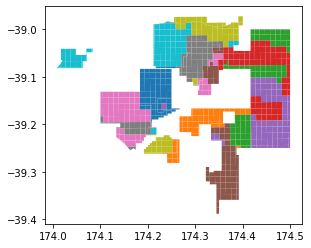

In [27]:
ax = res_intersection.plot(cmap='tab10')

In [28]:
inntersection_geo_data = GeoData(
    geo_dataframe=res_intersection,
    style={'color': 'blue', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
    hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
    name='Overlapping Area'
)

m = Map(center=(-41.2865, 174.7762), zoom=7, layout=dict(height='800px'))
m.add_layer(inntersection_geo_data)

m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [29]:
res_intersection.area

0      0.000144
1      0.000144
2      0.000144
3      0.000144
4      0.000014
         ...   
770    0.000144
771    0.000144
772    0.000144
773    0.000009
774    0.000001
Length: 775, dtype: float64